<a href="https://colab.research.google.com/github/AbhiramNallamothu/Assignments-5731/blob/main/Abhiram_Nallamothu_Assignment_(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [11]:
!pip install BERTopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.5/158.5 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 36.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 17.7 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (73

In [12]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from bertopic import BERTopic

# Load the dataset
df = pd.read_csv('/content/annotated_imdb_reviews.csv')
df.dropna(subset=['clean_text'], inplace=True)  # Remove rows with missing 'clean_text'

# Vectorization for LDA and LSA
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['clean_text'])

# LDA Model
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_topics = lda_model.fit_transform(tfidf_matrix)

# LSA Model
lsa_model = TruncatedSVD(n_components=10, random_state=42)
lsa_topics = lsa_model.fit_transform(tfidf_matrix)

# Display function for topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

# BERTopic Model
bertopic_model = BERTopic(language='english')
bertopic_topics = bertopic_model.fit_transform(df['clean_text'])

# Display LDA and LSA topics
print("LDA Topics:")
display_topics(lda_model, tfidf_vectorizer.get_feature_names_out(), 10)

print("\nLSA Topics:")
display_topics(lsa_model, tfidf_vectorizer.get_feature_names_out(), 10)

# Display BERTopic topics
print("\nBERTopic Topics:")
bertopic_summary = bertopic_model.get_topic_info()
print(bertopic_summary[['Topic', 'Name', 'Count']][:10])

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

LDA Topics:
Topic 0:
dream movi reflect subconsci realiti suspens spin incept question accomplish
Topic 1:
film nolan incept dream zimmer mindbend intric masterpiec perform han
Topic 2:
impress film slow dream showcas movi manner use act charact
Topic 3:
dream make amaz film cool incept time end nolan movi
Topic 4:
watch realli time alway thing sever good dicarpio oh imax
Topic 5:
film incept narr dream visual realiti depth subconsci power creat
Topic 6:
dream loss nuanc premis guilt cobb film offer redempt labyrinth
Topic 7:
better film major movi best nolan bond everyon provok follow
Topic 8:
dream film protagonist dominick deliber maze question incept ambigu audienc
Topic 9:
fantast alway time pick starstud water incred expect alltim actionsci

LSA Topics:
Topic 0:
film dream incept nolan realiti visual narr movi audienc cobb
Topic 1:
time make watch alway movi amaz everi stori like realli
Topic 2:
time alway sever stori watch everi blow new stun fantast
Topic 3:
dream dicarpio imax

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [13]:
# Write your code here
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the dataset
file_path = '/content/annotated_imdb_reviews.csv'
data = pd.read_csv(file_path)

# Encode the sentiment column
label_encoder = LabelEncoder()
data['sentiment'] = label_encoder.fit_transform(data['sentiment'])

# Split the dataset into training and testing sets (80% training, 20% testing)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(train_data['clean_text'])
X_test = tfidf.transform(test_data['clean_text'])
y_train = train_data['sentiment']
y_test = test_data['sentiment']

## Selecting Features for Sentiment Classification
# The primary feature selected is `clean_text`, which contains the pre-processed text of the reviews.
# This feature is essential as the sentiment expressed in the text is a direct indicator of the review's polarity (positive or negative).

## Model Training and Evaluation
# Initialize and train Logistic Regression and Random Forest models
logistic_model = LogisticRegression(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)

# Perform 10-fold cross-validation for both models
cv_scores_logistic = cross_val_score(logistic_model, X_train, y_train, cv=10)
cv_scores_forest = cross_val_score(random_forest_model, X_train, y_train, cv=10)

# Fit models on the entire training data
logistic_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

# Evaluate the models on the test set
y_pred_logistic = logistic_model.predict(X_test)
y_pred_forest = random_forest_model.predict(X_test)

# Generate and print classification reports for both models
report_logistic = classification_report(y_test, y_pred_logistic, target_names=label_encoder.classes_)
report_forest = classification_report(y_test, y_pred_forest, target_names=label_encoder.classes_)

# Print results
print("Logistic Regression Cross-Validation Scores (Accuracy):", cv_scores_logistic)
print("Random Forest Cross-Validation Scores (Accuracy):", cv_scores_forest)
print("\nLogistic Regression Test Set Report:\n", report_logistic)
print("\nRandom Forest Test Set Report:\n", report_forest)




Logistic Regression Cross-Validation Scores (Accuracy): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Random Forest Cross-Validation Scores (Accuracy): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Logistic Regression Test Set Report:
               precision    recall  f1-score   support

    negative       1.00      1.00      1.00        50
    positive       1.00      1.00      1.00       150

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Random Forest Test Set Report:
               precision    recall  f1-score   support

    negative       1.00      1.00      1.00        50
    positive       1.00      1.00      1.00       150

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

# Initial look at the data structure
print(train_df.info())

# Summarize numerical features
print(train_df.describe())

# Check for missing values
missing = train_df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

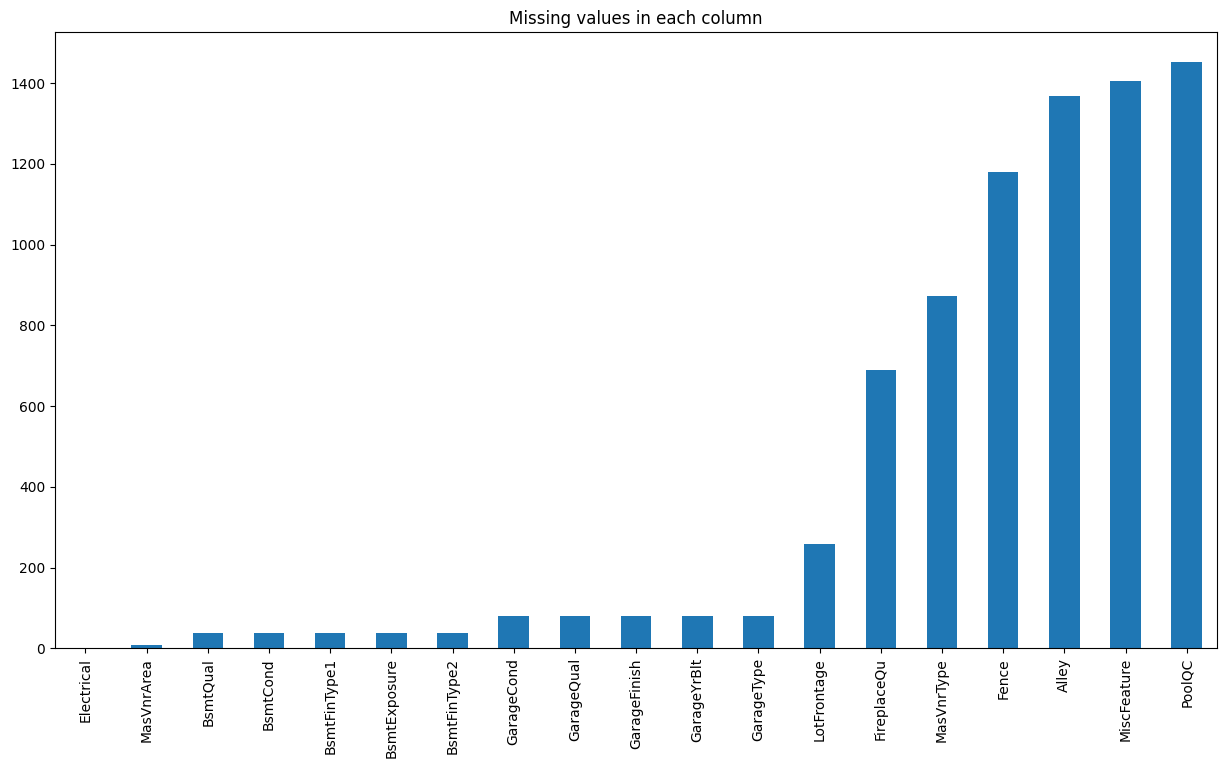

In [ ]:
# Visualize missing data
plt.figure(figsize=(15, 8))
missing.plot.bar()
plt.title('Missing values in each column')
plt.show()


In [4]:
# Dropping columns with more than 15% missing values
missing_cols = missing[missing > len(train_df) * 0.15].index
train_df.drop(missing_cols, axis=1, inplace=True)

# Imputing numerical columns with the median
for col in train_df.columns:
    if train_df[col].dtype in ['int64', 'float64']:
        train_df[col].fillna(train_df[col].median(), inplace=True)

# Imputing categorical columns with the mode
for col in train_df.columns:
    if train_df[col].dtype == 'object':
        train_df[col].fillna(train_df[col].mode()[0], inplace=True)


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
GarageYrBlt      0.466754
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


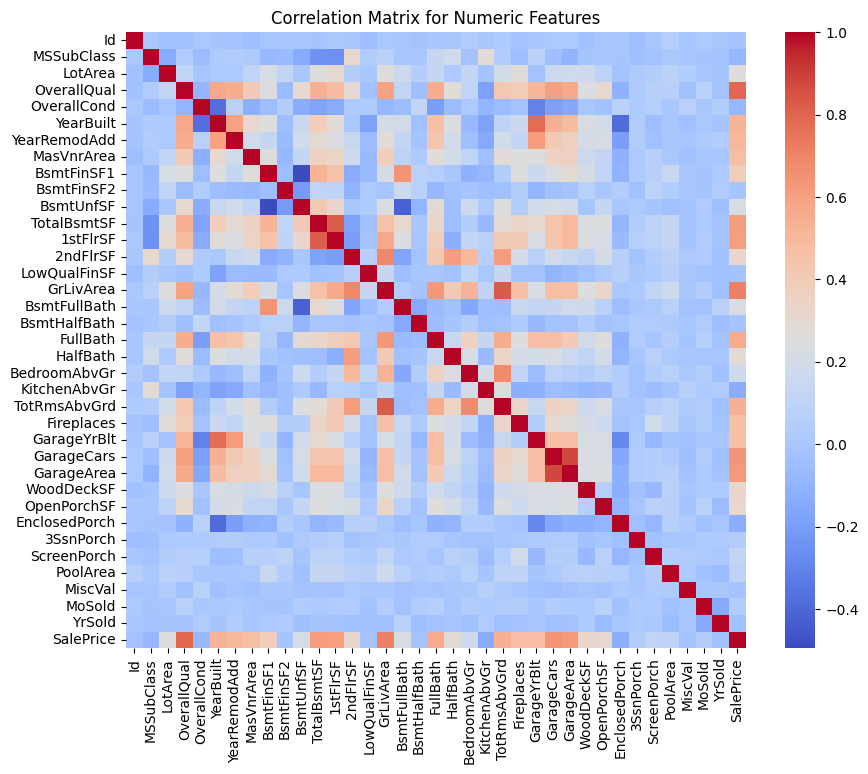

In [5]:
import numpy as np
numeric_cols = train_df.select_dtypes(include=[np.number])  # This ensures only numeric columns are considered

# Calculating correlation matrix
correlation = numeric_cols.corr()
print(correlation['SalePrice'].sort_values(ascending=False))

# Visualize the correlation matrix of features with 'SalePrice'
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix for Numeric Features')
plt.show()

Features are selected based on their correlation with the SalePrice. High correlation (> 0.5) suggests a strong linear relationship which is beneficial for a linear regression model.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Selecting highly correlated features (you can adjust the threshold as needed)
high_corr_features = correlation.index[correlation['SalePrice'] > 0.5].tolist()
print("Highly correlated features: ", high_corr_features)

# Building a regression model using selected features
X = numeric_cols[high_corr_features].drop('SalePrice', axis=1)
y = numeric_cols['SalePrice']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_test)

# Evaluating the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')


Highly correlated features:  ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']
RMSE: 39474.54338116007
R^2: 0.7968483304281099


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [8]:
# Write your code here
import pandas as pd
from transformers import pipeline
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Load the annotated IMDb reviews dataset
df = pd.read_csv('/content/annotated_imdb_reviews.csv')

# Initialize the Hugging Face zero-shot classification pipeline with DistilBERT
classifier = pipeline("zero-shot-classification", model="distilbert-base-uncased")

# Define the sentiment labels
labels = ["positive", "negative"]

# Perform zero-shot classification and collect predictions
predictions = []
for review in df["clean_text"]:
    result = classifier(review, candidate_labels=labels)
    predictions.append(result["labels"][0])

# Evaluate performance
accuracy = accuracy_score(df["sentiment"], predictions)
precision, recall, f1, _ = precision_recall_fscore_support(df["sentiment"], predictions, average="binary", pos_label="positive")

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')




/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Failed to determine 'entailment' label id from the label2id mapping in the model config. Setting to -1. Define a descriptive label2id mapping in the model config to ensure correct outputs.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Accuracy: 0.28
Precision: 1.0
Recall: 0.05263157894736842
F1 Score: 0.1


1. Description of the Pre-trained Language Model (PLM) For this sentiment analysis task, we will use the DistilBERT model, which is a lighter version of BERT designed for faster processing with fewer parameters. DistilBERT: Pretraining Data Sources: DistilBERT was trained on the same corpus as BERT, which includes the Toronto Book Corpus and Wikipedia, providing a wide variety of topics and a large amount of text. Number of Parameters: DistilBERT has 66 million parameters, which is roughly half that of BERT-base. The reduction in parameters comes with a minimal loss in performance, making it efficient. Task-Specific Fine-Tuning: For this task, we are not applying any fine-tuning; we are using the model in a zero-shot setting, where the model predicts sentiment based on the knowledge it gained during pretraining.
2. Sentiment Analysis Using DistilBERT in a Zero-Shot Setting We'll utilize the transformers library from Hugging Face to load DistilBERT and perform zero-shot sentiment classification on the dataset from Assignment 3. Then, we'll evaluate the model's performance using Accuracy, Precision, Recall, and F1 metrics.
3. Discussion of Advantages, Disadvantages, and Challenges Advantages: Efficiency: DistilBERT offers a good balance between performance and efficiency, being faster than BERT while still maintaining most of its accuracy. Flexibility: The zero-shot classification capability is powerful as it allows the model to perform tasks it wasn't explicitly fine-tuned for. Transfer Learning: Utilizes knowledge from pretraining on a diverse text corpus, making it versatile for a variety of NLP tasks. Disadvantages: Resource Intensive: Despite being lighter than BERT, DistilBERT can still be resource-intensive, requiring significant computation power compared to traditional ML models. Lack of Domain-Specific Tuning: Zero-shot learning may not perform as well as a fine-tuned model, especially in domains that differ significantly from the model's training data. Challenges: Labels Matching: The zero-shot classification requires careful selection of labels that match the possible outputs of the model. Misalignment can lead to inaccurate predictions. Context Understanding: As with many PLMs, understanding context and sarcasm can be difficult and may lead to incorrect sentiment classification.